In [71]:
! pip install aicsimageio matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 2.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.7 MB/s eta 0:00:00


In [28]:
from ome_zarr.io import parse_url
from ome_zarr.reader import Reader

#url = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr"
url = "../data/xy_8bit__nuclei_PLK1_control.ome.zarr"

In [26]:

# read the image data
store = parse_url(url, mode="r").store
reader = Reader(parse_url(url))
# nodes may include images, labels etc
list( = reader())nodes
nodes

[../data/xy_8bit__nuclei_PLK1_control.ome.zarr/ [zgroup]]

In [23]:
# first node will be the image pixel data
image_node = nodes[0]
image_node

../data/xy_8bit__nuclei_PLK1_control.ome.zarr/ [zgroup]

In [80]:
metadata = image_node.metadata
metadata

{'axes': [{'unit': 'second', 'name': 't', 'type': 'time'},
  {'name': 'c', 'type': 'channel'},
  {'name': 'z', 'type': 'space'},
  {'unit': 'micrometer', 'name': 'y', 'type': 'space'},
  {'unit': 'micrometer', 'name': 'x', 'type': 'space'}],
 'name': ['Channel 0'],
 'coordinateTransformations': [[{'scale': [299.35504150390625,
     1.0,
     1.0,
     0.166053183181403,
     0.166053183181403],
    'type': 'scale'}],
  [{'scale': [299.35504150390625,
     1.0,
     1.0,
     0.332106366362806,
     0.332106366362806],
    'type': 'scale'}],
  [{'scale': [299.35504150390625,
     1.0,
     1.0,
     0.664212732725612,
     0.664212732725612],
    'type': 'scale'}]],
 'visible': [True],
 'contrast_limits': [[0.0, 251.0]],
 'colormap': [[[0, 0, 0], [1, 1, 1]]]}

In [25]:
dask_data = image_node.data
dask_data

[dask.array<from-zarr, shape=(1, 1, 1, 682, 682), dtype=uint8, chunksize=(1, 1, 1, 682, 682), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1, 1, 1, 341, 341), dtype=uint8, chunksize=(1, 1, 1, 341, 341), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(1, 1, 1, 170, 170), dtype=uint8, chunksize=(1, 1, 1, 170, 170), chunktype=numpy.ndarray>]

# Test with AICSimageIO ome-zarr IO

In [29]:
from aicsimageio import AICSImage

In [55]:
img = AICSImage(url)

In [56]:
img.xarray_data

<xarray.DataArray (T: 1, C: 1, Z: 1, Y: 682, X: 682)>
array([[[[[1, 1, 4, ..., 0, 0, 0],
          [1, 2, 1, ..., 0, 0, 0],
          [3, 0, 2, ..., 0, 3, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 2, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]]], dtype=uint8)
Coordinates:
  * C        (C) <U9 'Channel 0'
Dimensions without coordinates: T, Z, Y, X
Attributes:
    unprocessed:  {'multiscales': [{'metadata': {'method': 'loci.common.image...

In [39]:
img.channel_names

['Channel 0']

In [75]:
lazy_c0 = img.get_image_dask_data("YX", C=0)
lazy_c0.shape

(682, 682)

In [76]:
lazy_c0

dask.array<transpose, shape=(682, 682), dtype=uint8, chunksize=(682, 682), chunktype=numpy.ndarray>

In [77]:
import matplotlib.pyplot as plt

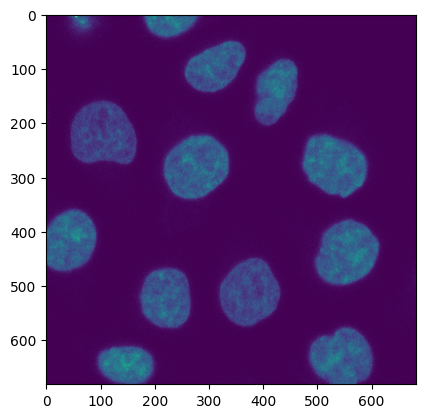

In [78]:
plt.imshow(lazy_c0)

In [44]:
from IPython.display import Image
Image(lazy_c0.compute())

In [69]:
img.get_image_dask_data("YX").to_dask_dataframe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8